In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from topostats.io import LoadScans
import topostats.filters as topofilters
from topostats.utils import get_mask
from skimage.filters import gaussian
from skimage.morphology import remove_small_objects, label
from skimage.measure import regionprops
from skimage import draw
from topostats.theme import Colormap
import math

In [2]:
cmap = Colormap("nanoscope").get_cmap()

def plot(image: np.ndarray, title: str=None, zlimit: bool=True, figsize: tuple=(8, 8), **kwargs) -> None:
    fig, ax = plt.subplots(figsize=figsize)
    if zlimit == True:
        vmin=-3
        vmax=4
    else:
        vmin=None
        vmax=None
    ax.imshow(image, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)
    if title is not None:
        ax.set_title(title)
    plt.show()

[Fri, 25 Aug 2023 11:43:25] [INFO    ] [topostats] Extracting image from PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm
[Fri, 25 Aug 2023 11:43:25] [INFO    ] [topostats] Loading image from : PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm
[Fri, 25 Aug 2023 11:43:25] [INFO    ] [topostats] [20230125_KPN005_25mMMgCl2_Vac.0_00009] : Loaded image from : PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm
[Fri, 25 Aug 2023 11:43:25] [INFO    ] [topostats] [20230125_KPN005_25mMMgCl2_Vac.0_00009] : Extracted channel Height
[Fri, 25 Aug 2023 11:43:25] [INFO    ] [topostats] [20230125_KPN005_25mMMgCl2_Vac.0_00009] : Pixel to nm scaling : 2.67421875


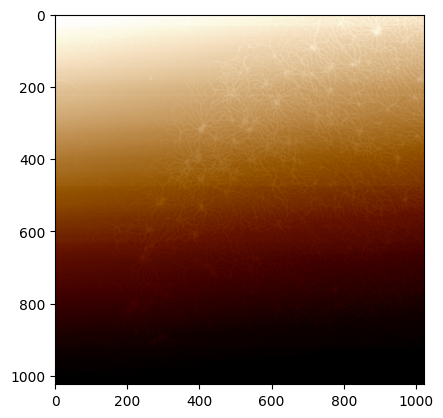

In [87]:
#Import SPM files
file = Path('./PristineZoom/20230125_KPN005_25mMMgCl2_Vac.0_00009.spm')
#file = Path('./PristineZoom/20230126_KPN005_25mMMgCl2_Vac_24hr.0_00006.spm')
#file = Path('./EP_Zoom/20230419_EPN005_Metal.0_00006.spm')

loadscans = LoadScans([file], 'Height')
loadscans.get_data()
p_to_nm = loadscans.pixel_to_nm_scaling
image_raw = loadscans.image
plt.imshow(image_raw, cmap=cmap)

In [88]:
filters = topofilters.Filters(
    image = image_raw,
    filename = file,
    pixel_to_nm_scaling = p_to_nm,
    threshold_method='std_dev',
    row_alignment_quantile=0.05,
    threshold_std_dev={'upper': 1.0, 'lower': None},
    gaussian_size=1.0,
    remove_scars={'run': False}
)

filters.filter_image()

[Fri, 25 Aug 2023 11:43:29] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : Median flattening without mask


[Fri, 25 Aug 2023 11:43:29] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : Plane tilt removal without mask
[Fri, 25 Aug 2023 11:43:29] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : x-polyfit 1st order: [-0.00532818  5.32807387]
[Fri, 25 Aug 2023 11:43:29] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : y-polyfit 1st order: [-2.55270905e-04  2.86789761e+00]
[Fri, 25 Aug 2023 11:43:29] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : Removing x plane tilt
[Fri, 25 Aug 2023 11:43:31] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : removing y plane tilt
[Fri, 25 Aug 2023 11:43:32] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : Remove quadratic bow without mask
[Fri, 25 Aug 2023 11:43:32] [INFO    ] [topostats] [PristineZoom\20230125_KPN005_25mMMgCl2_Vac.0_00009.spm] : x polyfit 2nd orde

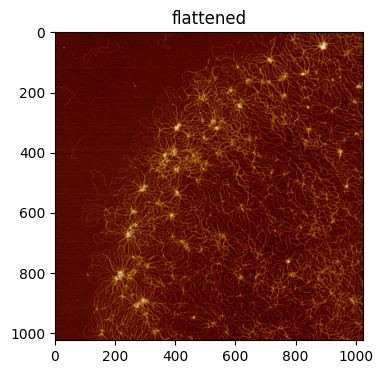

In [89]:
flattened = filters.images['zero_average_background']
plot(flattened, title='flattened',figsize=(4,4))

In [99]:
# Step over whole image
stepsize_px = 5
kernel_size = 7
densities = []
density_map = np.zeros((int(np.floor(flattened.shape[0] / stepsize_px)), int(np.floor(flattened.shape[1] / stepsize_px))))    
print(f"density map dimensions: {density_map.shape}")
for j in range(1,density_map.shape[0]):
    for i in range(1,density_map.shape[1]):
        # Calculate local density
        area = stepsize_px**2 * p_to_nm**2
        x = i * stepsize_px
        y = j * stepsize_px
        volume = np.sum(flattened[y - kernel_size : y + kernel_size, x - kernel_size : x + kernel_size])
        density = volume / area
        print(density)
        density_map[i, j] = density
        densities.append(density)


density map dimensions: (204, 204)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.14132215662622163
-0.13976015269119235
-0.12129485965214887
-0.12986481675310327
-0.12153148475004466
-0.13431859952721548
-0.14287700382845375
-0

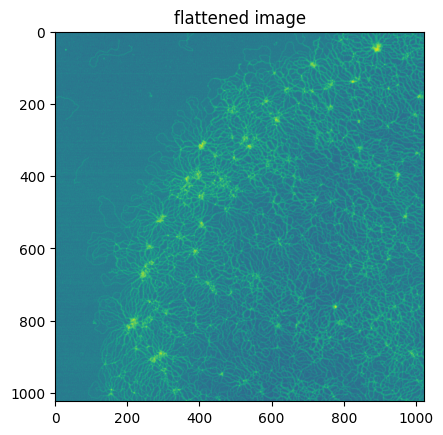

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -0.14132216 ... -0.04371809 -0.06255392
  -0.04851461]
 ...
 [ 0.          0.          0.43043271 ...  0.06752709  0.27767864
   0.35762577]
 [ 0.          0.          0.23334768 ...  0.12393363  0.33915502
   0.37093874]
 [ 0.          0.          0.22638518 ...  0.18879374  0.33979726
   0.38256562]]


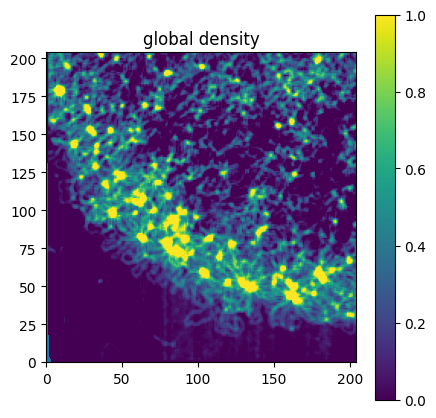

In [100]:
#Apply unit scaling
plt.imshow(flattened, vmin=-3, vmax=4)
plt.title('flattened image')
plt.show()

plt.figure(figsize = (5,5))
plt.imshow(density_map,vmin=0, vmax=1)
plt.ylim(0,density_map.shape[1])
plt.xlim(0,density_map.shape[0])
plt.colorbar()
plt.title('global density')
plt.show

plt.hist(x=densities, bins=100)
plt.show()
